In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

## Reading and Undestanding the Data

In [2]:
df = pd.read_csv("car_evaluation.csv", header=None)

In [3]:
df.describe()

,0,1,2,3,4,5,6
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [4]:
df.shape

(1728, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Observations
1. The columns have no names
2. There are 1728 rows of data with 7 columns

## Data Cleansing and Transformation

#### Based on the dataset description given in kaggle, from where this data was downloaded (https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set), the attributes are
- buying
- maint
- doors
- persons
- lug_boot
- safety

And the final column is the "decision column"

In [7]:
# Rename Columns

col_names = ['buying', 'maint', 'doors', 'persons','lug_boot', 'safety', 'class']
df.columns = col_names

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
# Check their frequency counts of all columns to see which are categorical variables

for col in col_names:
    print(df[col].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [11]:
# Check for null values

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Conclusions
1. There are 7 variables and all are categorical
2. Class variable is the target variable
3. There are no missing values and hence no null values treatment to be given
4. No need to drop any columns or rows
5. Since they are all categorical variables, there is no outlier treatment required
6. Categorical data encoding is required

## Data Preparation & Feature Engineering

In [12]:
# First separate out the feature vector from the target variables

X = df.drop(['class'], axis=1)
y = df['class']

In [13]:
# split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [15]:
# !pip install --upgrade category_encoders
# !pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org category_encoders

In [16]:
# use categorical encoder to encode the ariables.
# This is done based on the train dataset so that the unquie values in the train set are encoded
# The same encoding is applied on the test set too

import category_encoders as ce

In [17]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


## Decision Tree Model - Classification

In [20]:
## using the default parameters except max_depth.
## We will also use the 'gini' criterion for checking the homogeniety of nodes

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [21]:
dt = DecisionTreeClassifier(max_depth=3)

In [22]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [23]:
# This helps to show an impage on Jupyter notebook
from IPython.display import Image
#This is to output the graph into a file
from six import StringIO
# This will help in exporting the graph vizualisation
from sklearn.tree import export_graphviz
import pydotplus, graphviz 

[Text(223.20000000000002, 190.26, 'X[5] <= 2.5\ngini = 0.452\nsamples = 1382\nvalue = [301, 58, 975, 48]'),
 Text(167.4, 135.9, 'X[3] <= 2.5\ngini = 0.577\nsamples = 913\nvalue = [301, 58, 506, 48]'),
 Text(111.60000000000001, 81.53999999999999, 'X[1] <= 1.5\ngini = 0.631\nsamples = 615\nvalue = [301, 58, 208, 48]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.462\nsamples = 149\nvalue = [54, 0, 95, 0]'),
 Text(167.4, 27.180000000000007, 'gini = 0.634\nsamples = 466\nvalue = [247, 58, 113, 48]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 298\nvalue = [0, 0, 298, 0]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 469\nvalue = [0, 0, 469, 0]')]

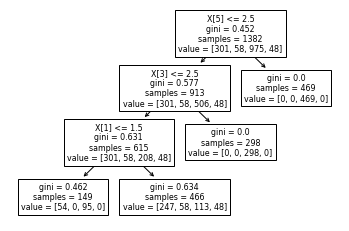

In [24]:
tree.plot_tree(dt.fit(X_train, y_train))

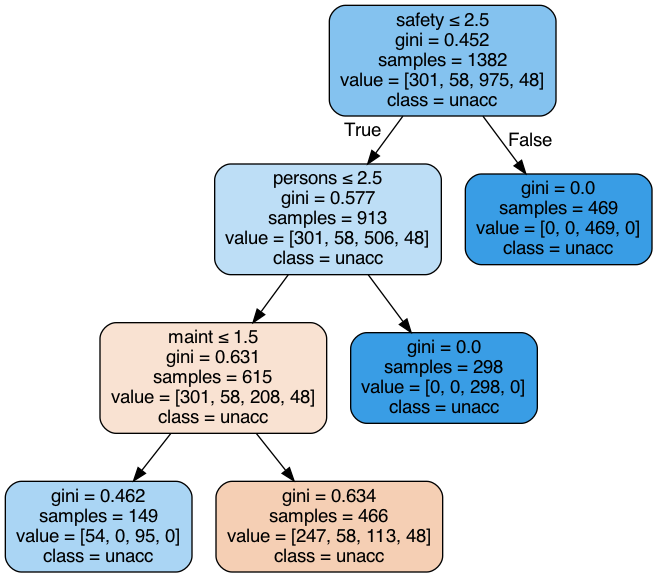

In [38]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
               feature_names=X.columns,
               class_names=y_train,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### Evaluate the model performance

In [33]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8024602026049205


array([[247,   0,  54,   0],
       [ 58,   0,   0,   0],
       [113,   0, 862,   0],
       [ 48,   0,   0,   0]])

In [34]:
print("Test set performance")
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

Test set performance
0.8179190751445087


array([[ 65,   0,  18,   0],
       [ 11,   0,   0,   0],
       [ 17,   0, 218,   0],
       [ 17,   0,   0,   0]])

### Conclusion

The model is doing pretty well since the accruracy for train is 80% and that for test is 81% showing that the model is not overfitted to the training set.